In [1]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns


In [2]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [3]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
r = 10
c = 10
showImages(r,c,X =x_train,Y = y_train)

NameError: ignored

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

NameError: ignored

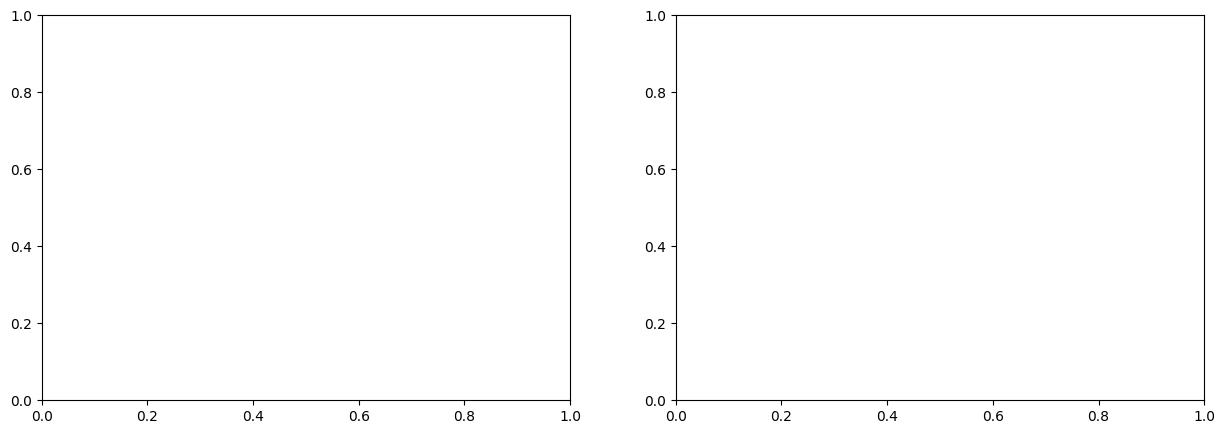

In [5]:
fig,axs = pyplot.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training Data Distribution')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing Data Distribution')
axs[1].set_xlabel('Classes')
pyplot.show()

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Assigment-6

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv files/connsumerComplaintsSmall (1).csv')


texts = data['Consumer complaint narrative'].astype(str)
labels = data['Product']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
vocab_size = 10000


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:
# Create a label encoder and fit it to all labels
label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)

# Encode both training and testing labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

1/1 [==============================] - 1s 1s/step - loss: 2.1446 - accuracy: 0.0000e+00
Test accuracy: 0.0


Assigment-7

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv');

In [ ]:


X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
57/57 [==============================] - 28s 389ms/step - loss: 1.3887 - accuracy: 0.2967 - val_loss: 1.3782 - val_accuracy: 0.3167
Epoch 2/10
57/57 [==============================] - 19s 335ms/step - loss: 1.3815 - accuracy: 0.3175 - val_loss: 1.3854 - val_accuracy: 0.3167
Epoch 3/10
57/57 [==============================] - 15s 267ms/step - loss: 1.3837 - accuracy: 0.3175 - val_loss: 1.3763 - val_accuracy: 0.3167
Epoch 4/10
57/57 [==============================] - 14s 252ms/step - loss: 1.3840 - accuracy: 0.3028 - val_loss: 1.3804 - val_accuracy: 0.2419
Epoch 5/10
57/57 [==============================] - 15s 256ms/step - loss: 1.3795 - accuracy: 0.3144 - val_loss: 1.4065 - val_accuracy: 0.2658
Epoch 6/10
57/57 [==============================] - 15s 259ms/step - loss: 1.3938 - accuracy: 0.2854 - val_loss: 1.3808 - val_accuracy: 0.3183
Epoch 7/10
57/57 [==============================] - 15s 268ms/step - loss: 1.3817 - accuracy: 0.3169 - val_loss: 1.3771 - val_accuracy: 0.3160

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

99/99 [==============================] - 4s 38ms/step - loss: 1.3793 - accuracy: 0.3167
Test accuracy: 0.3166772723197937


In [ ]:

example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Emotion:", predicted_emotion)

1/1 [==============================] - 0s 338ms/step
Predicted Emotion: fear
